In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("data.csv", parse_dates=['time_occ', 'date_rpdt'], dtype={
    'area_name': 'category',
    'sub_area_code': np.int16,
    'crime_class': np.int8,
    'crime_code': np.int16,
    'crime_dsp': 'category',
    'suspect_mo_code': 'object',
    'vict_age': np.int8,
    'vict_sex': 'category',
    'vict_descent': 'category',
    'permis_dsp': 'category',
    'weapon_dsp': 'category',
    'case_status': 'category',
    'crime_cd2': np.int16,
    'crime_cd3': np.int16,
    'crime_cd4': np.int16,
    'location': 'object',
    'lat': 'float64',
    'lng': 'float64'
})
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761582 entries, 0 to 761581
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time_occ         761582 non-null  datetime64[ns]
 1   date_rpdt        761582 non-null  datetime64[ns]
 2   area_name        761582 non-null  category      
 3   sub_area_code    761582 non-null  int16         
 4   crime_class      761582 non-null  int8          
 5   crime_code       761582 non-null  int16         
 6   crime_dsp        761582 non-null  category      
 7   suspect_mo_code  657013 non-null  object        
 8   vict_age         761582 non-null  int8          
 9   vict_sex         761582 non-null  category      
 10  vict_descent     761582 non-null  category      
 11  permis_dsp       761582 non-null  category      
 12  weapon_dsp       761582 non-null  category      
 13  case_status      761582 non-null  category      
 14  crime_cd2        761

# columns distribution

array([[<Axes: title={'center': 'sub_area_code'}>,
        <Axes: title={'center': 'crime_class'}>,
        <Axes: title={'center': 'crime_code'}>],
       [<Axes: title={'center': 'vict_age'}>,
        <Axes: title={'center': 'crime_cd2'}>,
        <Axes: title={'center': 'crime_cd3'}>],
       [<Axes: title={'center': 'crime_cd4'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>]],
      dtype=object)

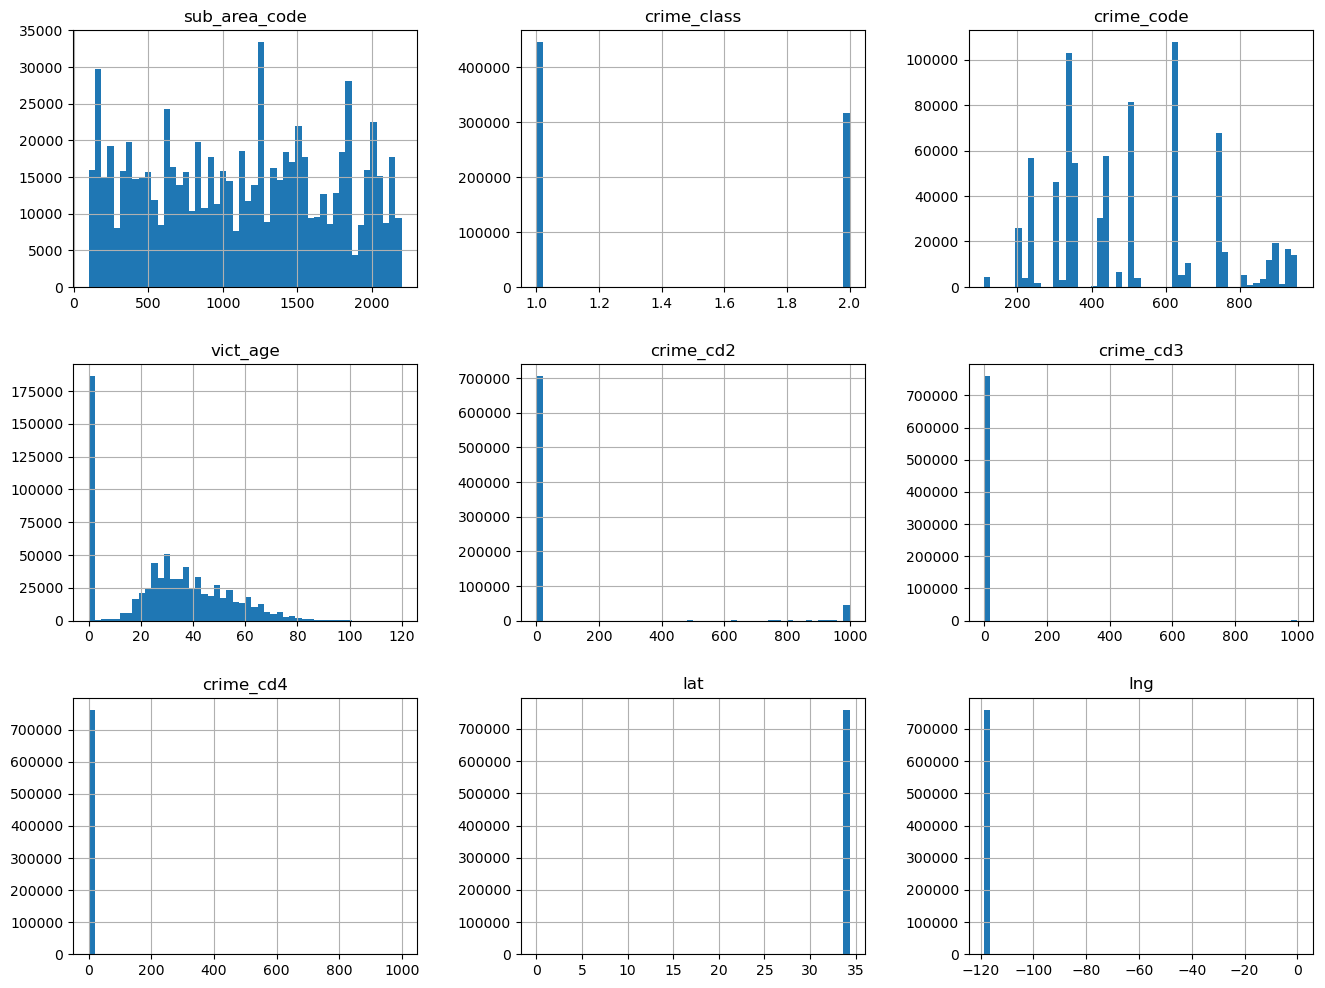

In [3]:
# plotting numeric columns distribution
df.select_dtypes(include='number').hist(figsize=(16, 12), bins=50, xlabelsize=10)

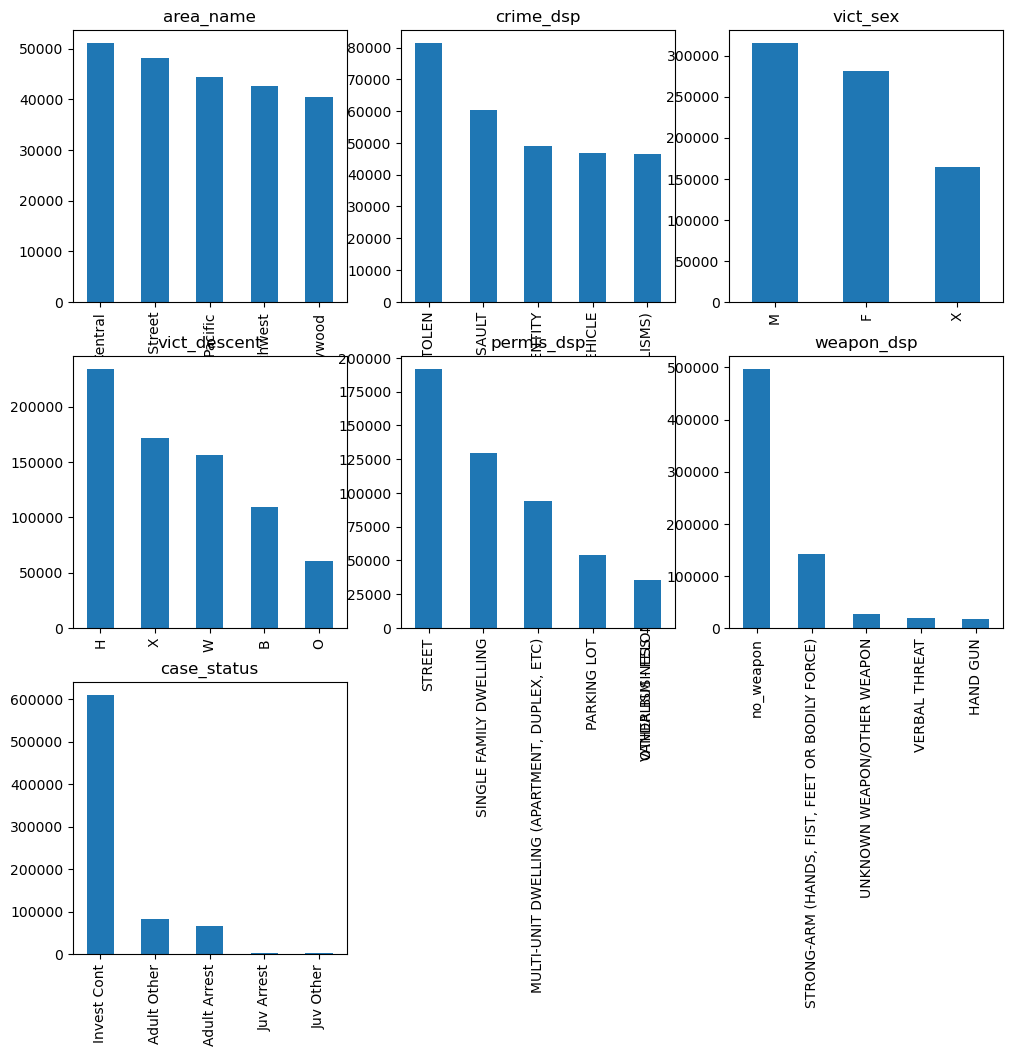

In [4]:
import matplotlib.gridspec as gridspec
fig =plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3,3)
i, j = 0, 0
for col in df.select_dtypes(include=['category']).columns:
    ax = fig.add_subplot(gs[i,j])
    # some columns contain multiple categories so we will just get the first 5
    data=df[col].value_counts().head().plot(kind='bar', ax=ax)
    ax.set_title(f'{col}')
    if j == 2:
        i +=1
        j = 0
    else:
        j+=1

# time series visualizations
##  Hourly

Text(0, 0.5, 'crime counts')

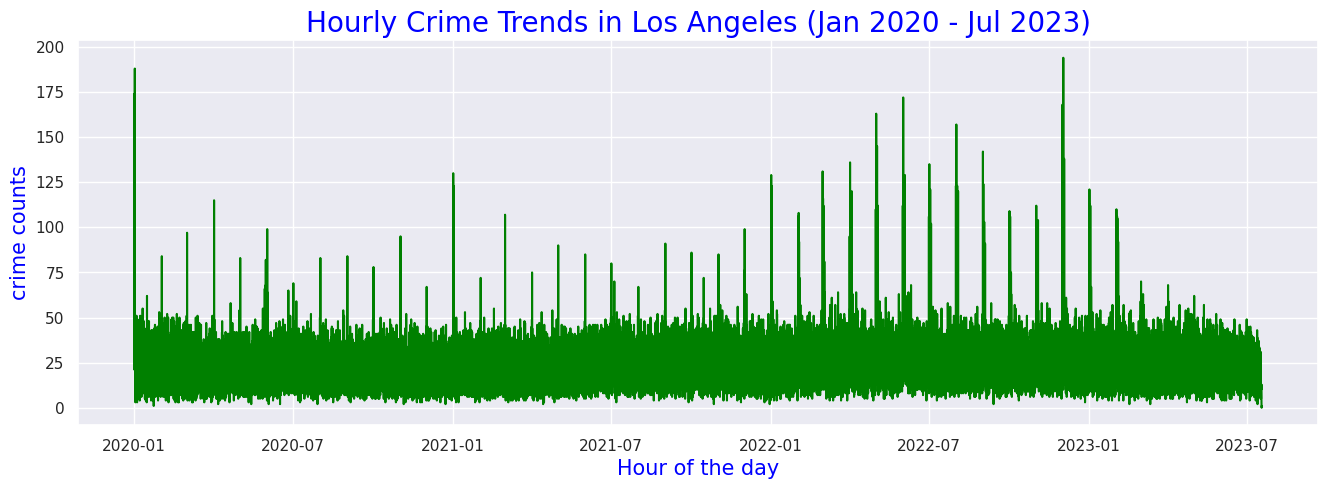

In [5]:
sns.set(rc={'figure.figsize':(16,5)})
sns.lineplot(data=df.resample('H', on='time_occ').size(), color='green')

plt.title('Hourly Crime Trends in Los Angeles (Jan 2020 - Jul 2023)',
         fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Hour of the day', fontdict={'color':'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color':'blue', 'size':15})

<function matplotlib.pyplot.show(close=None, block=None)>

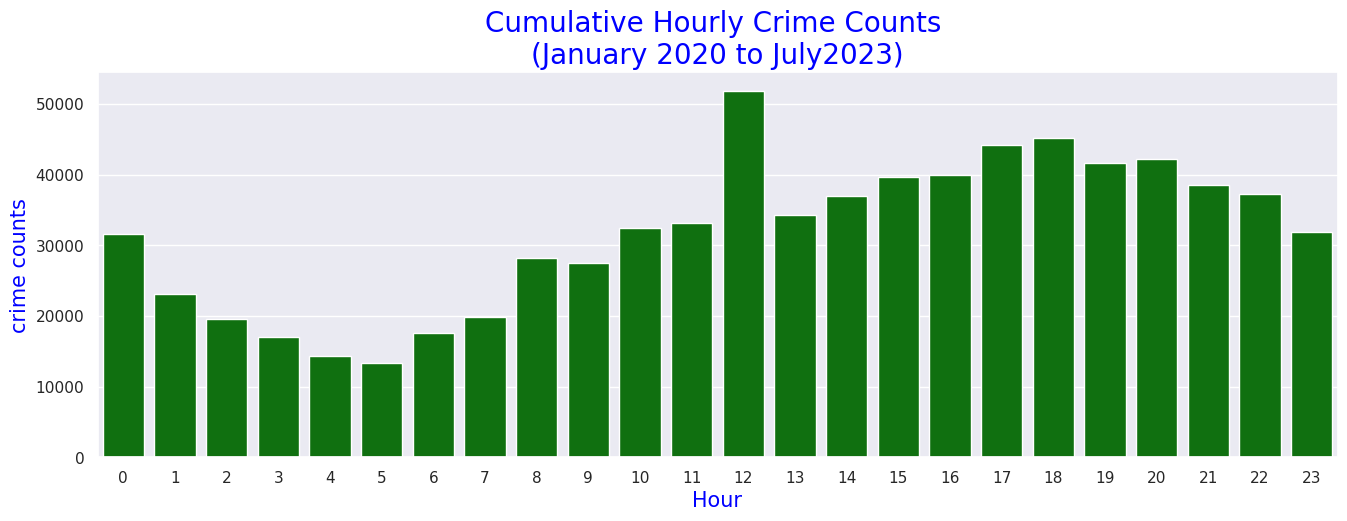

In [6]:
sns.barplot(df.groupby(by=df['time_occ'].dt.hour, as_index=False).size(), 
            x='time_occ', y='size', color='green')
plt.title('Cumulative Hourly Crime Counts \n(January 2020 to July2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'}, )
plt.xlabel('Hour', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

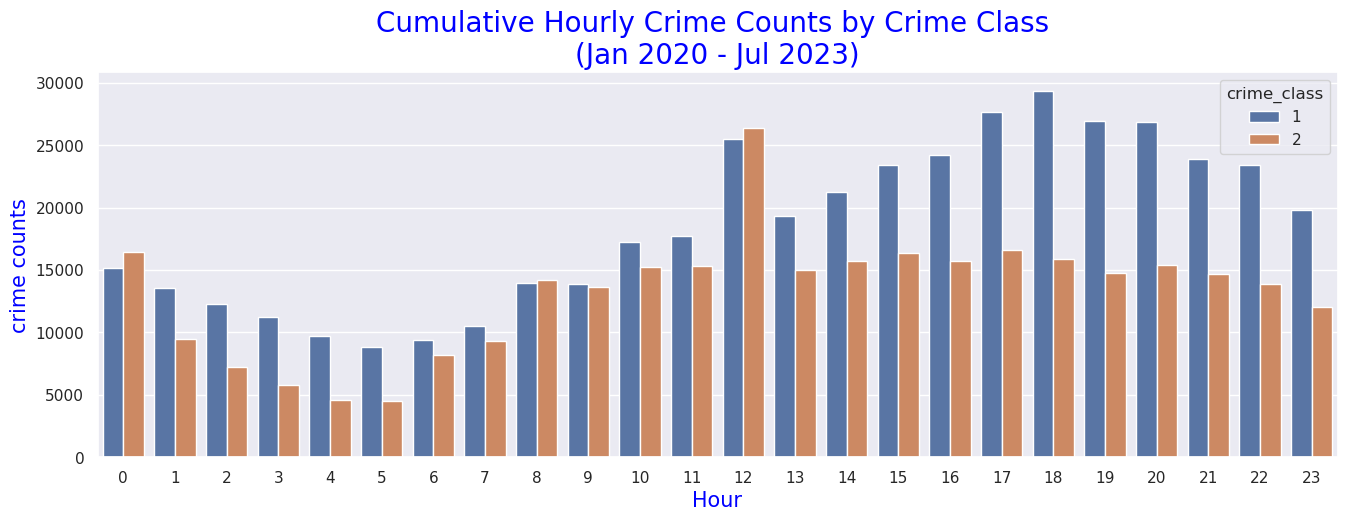

In [7]:
# hourly crime counts by crime class 
df1 = df.groupby(by=[df['time_occ'].dt.hour, 'crime_class'], as_index=False).size()
sns.barplot(data=df1, x='time_occ', y='size', hue='crime_class')
plt.title('Cumulative Hourly Crime Counts by Crime Class \n(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'}, )
plt.xlabel('Hour', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})
plt.show

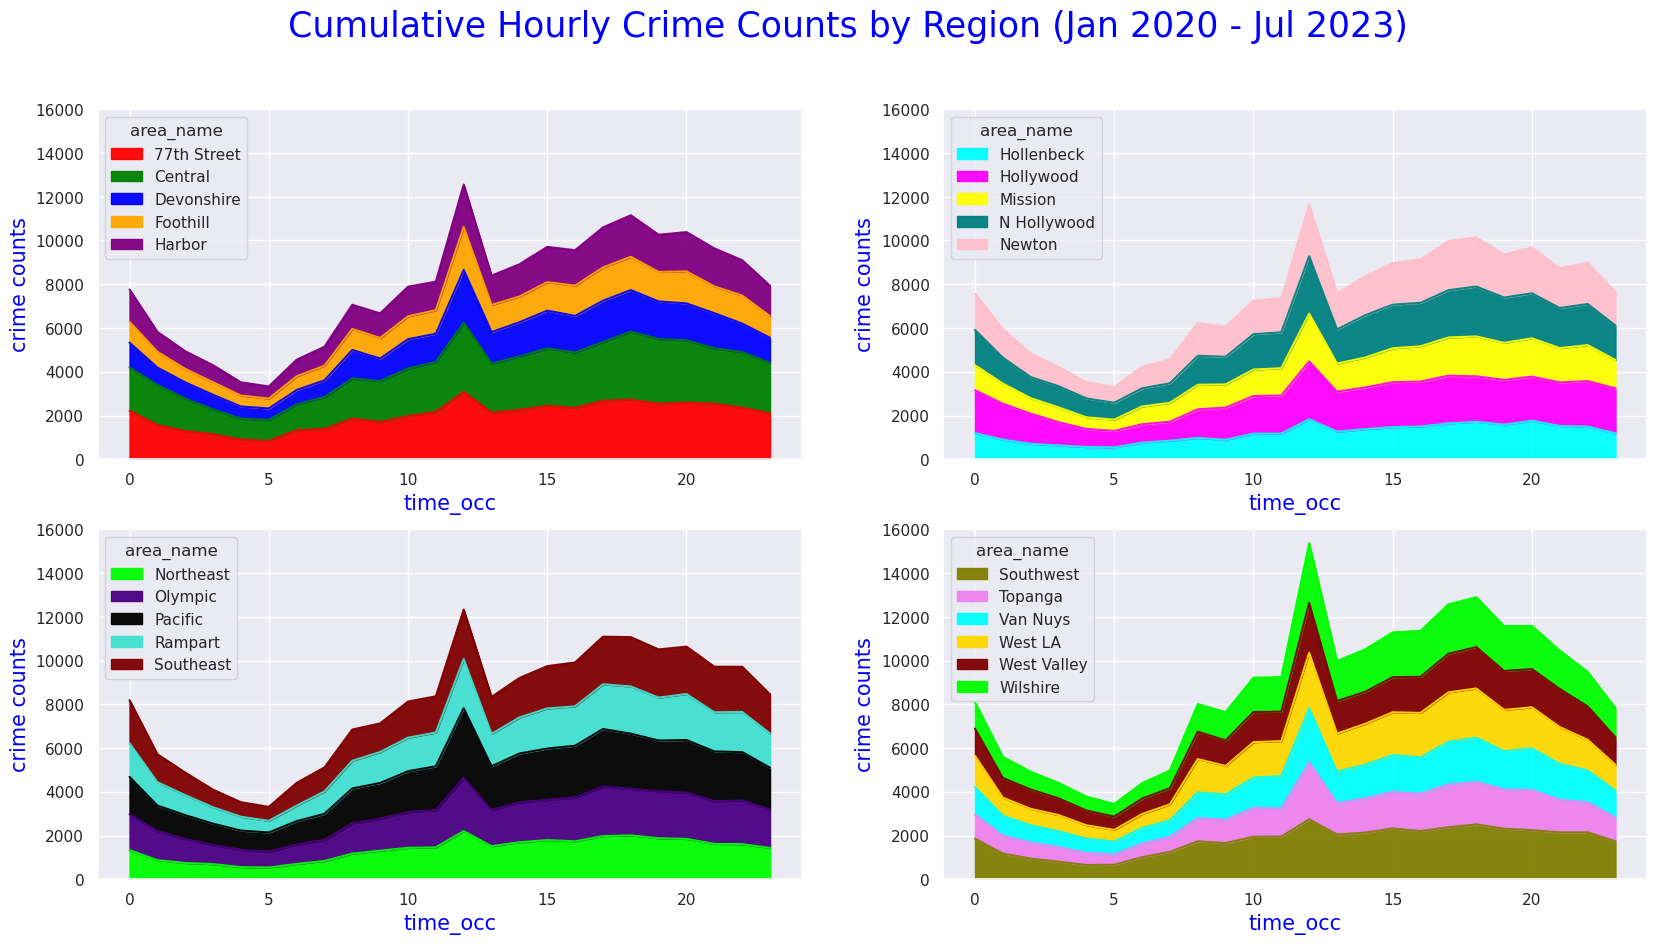

In [8]:
# region
df1 = df.groupby(by=[df['time_occ'].dt.hour, 'area_name'], as_index=False).size()

df1_1 = df1.pivot_table(index='time_occ', columns='area_name', values='size')


fig, ax = plt.subplots(2, 2 , figsize=(20,10))
for axes in ax.tolist():
    axes[0].set(ylim=(0,16000))
    axes[1].set(ylim=(0,16000))
    axes[0].set_xlabel('Hour', fontdict={'color': 'blue', 'size':15})
    axes[0].set_ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})
    axes[1].set_xlabel('Hour', fontdict={'color': 'blue', 'size':15})
    axes[1].set_ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})
    
df1_1.iloc[:,0:5].plot.area( alpha=0.95, ax=ax[0,0], color=['red', 'green', 'blue', 'orange', 'purple'])
df1_1.iloc[:,5:10].plot.area( alpha=0.95, ax=ax[0,1], color=['cyan', 'magenta', 'yellow', 'teal', 'pink'])
df1_1.iloc[:,10:15].plot.area( alpha=0.95, ax=ax[1,0], color=['lime', 'indigo', 'black', 'turquoise', 'maroon'])
df1_1.iloc[:,15:].plot.area( alpha=0.95, ax=ax[1,1], color=['olive', 'violet', 'aqua', 'gold', 'maroon', 'lime'])
fig.suptitle('Cumulative Hourly Crime Counts by Region (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'horizontalalignment': 'center'}, fontsize=25)
plt.show()

Text(0, 0.5, 'crime counts')

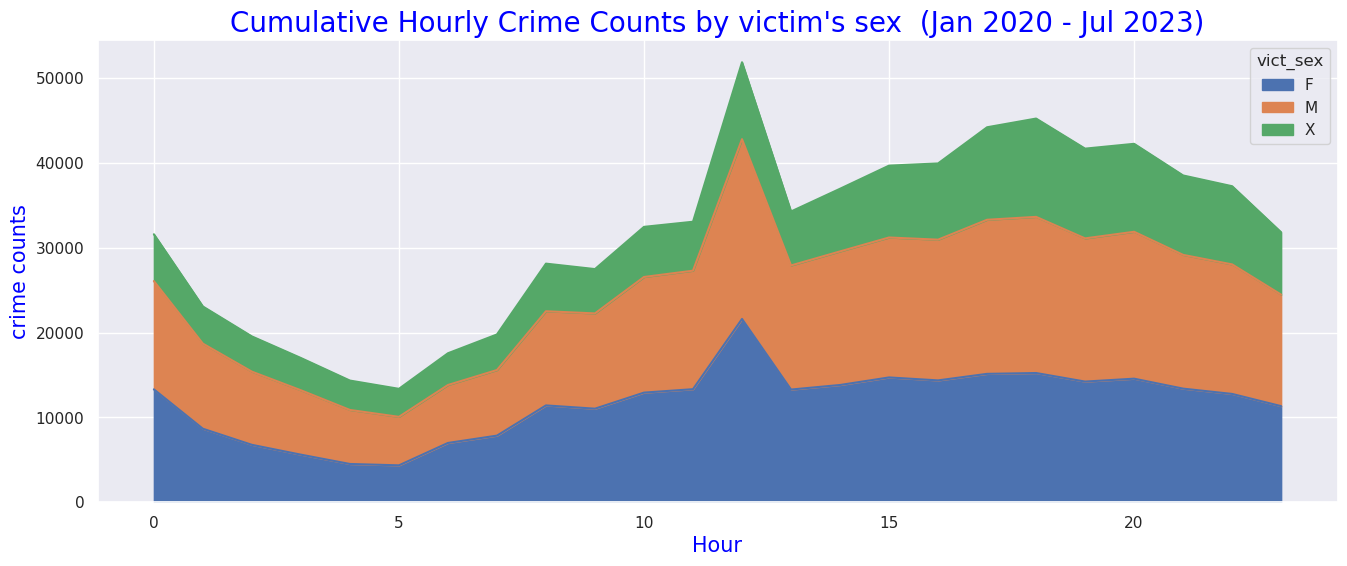

In [9]:
# victim sex
df1 = df.groupby(by=[df['time_occ'].dt.hour, 'vict_sex'], as_index=False).size()
df1_1 = df1.pivot(index='time_occ', columns='vict_sex', values='size')
df1_1.plot.area(figsize=(16,6) )
plt.title('Cumulative Hourly Crime Counts by victim\'s sex  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Hour', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})

Text(0, 0.5, 'crime counts')

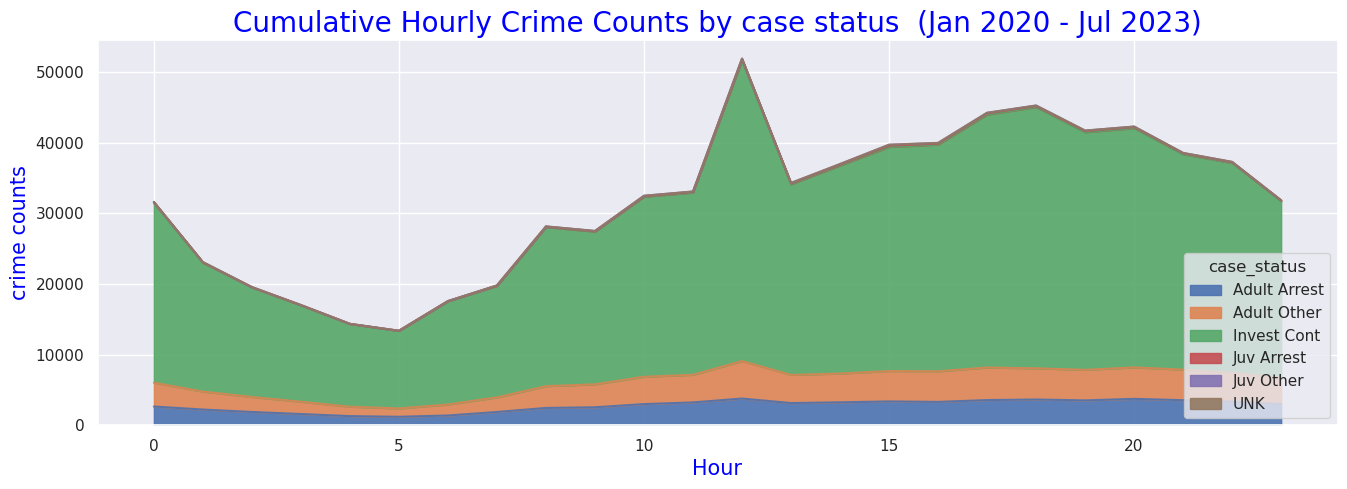

In [10]:
# case status
df1 = df.groupby(by=[df['time_occ'].dt.hour, 'case_status'], as_index=False).size()

df1_1 = df1.pivot_table(index='time_occ', columns='case_status', values='size').replace(np.nan, 0.0)

df1_1.plot.area(figsize=(16,5), alpha=0.9 )
plt.title('Cumulative Hourly Crime Counts by case status  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Hour', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})

(-1.0999999938649938,
 1.0999999942350094,
 -1.2499655428255483,
 4.249276518296508)

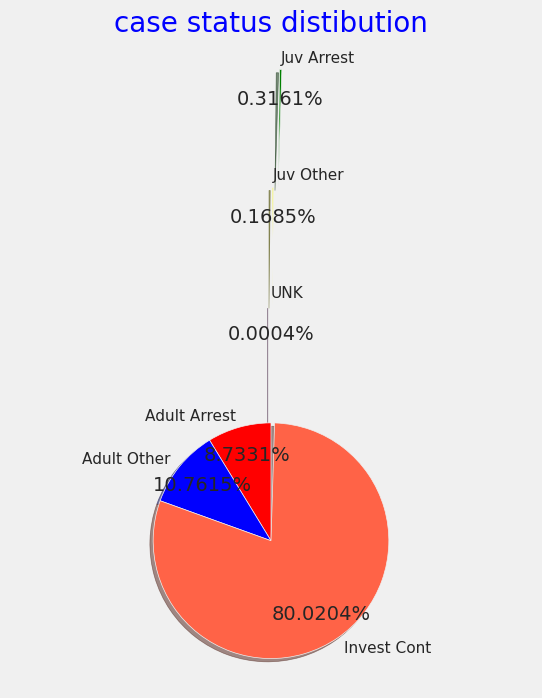

In [11]:
df1 = df.groupby("case_status", as_index=True).size()
plt.style.use('fivethirtyeight')

df1.plot(kind="pie",
                    figsize=(6, 8),
                     autopct="%1.4f%%",
                     startangle=90,
                     shadow=True,
                     colors = ["red", "blue", 'tomato', 'green', 'yellow', 'orchid'],
                     pctdistance=0.75,
                     explode=[0, 0, 0, 3, 2, 1])
plt.title("case status distibution", 
          fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.axis('equal')

## by day

Text(0, 0.5, 'crime counts')

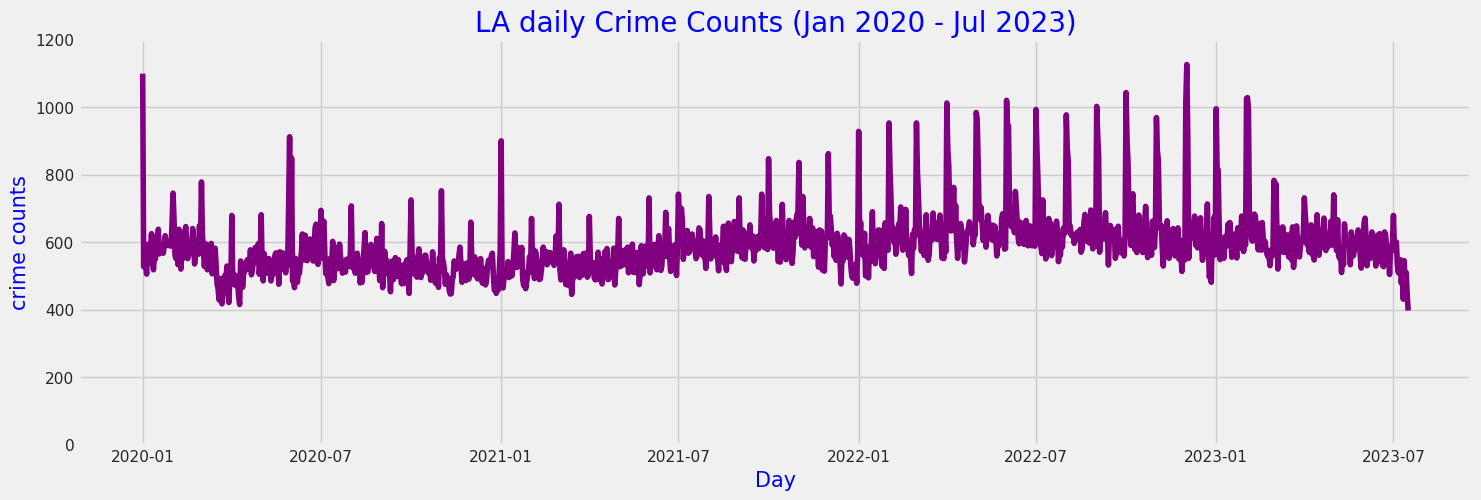

In [12]:
# daily number of crime
sns.lineplot(data=df.resample('D', on='time_occ').size().iloc[0:-1], color= 'purple')
plt.ylim((0,1200))
plt.title('LA daily Crime Counts (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Day', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})

Text(0, 0.5, 'Day')

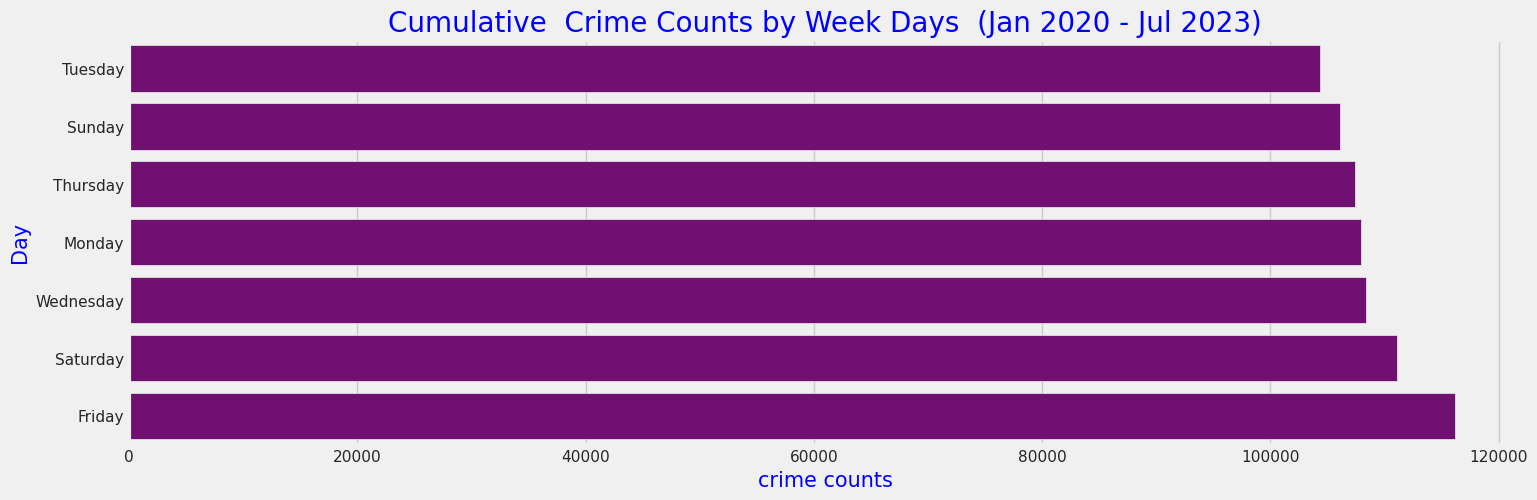

In [13]:
# weekday
sns.barplot(data= df.groupby(by=df['time_occ'].dt.day_name(), as_index=False).size().sort_values(by='size'), 
            y='time_occ', x='size' , color='purple')
plt.title('Cumulative  Crime Counts by Week Days  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.ylabel('Day', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'Day of Month')

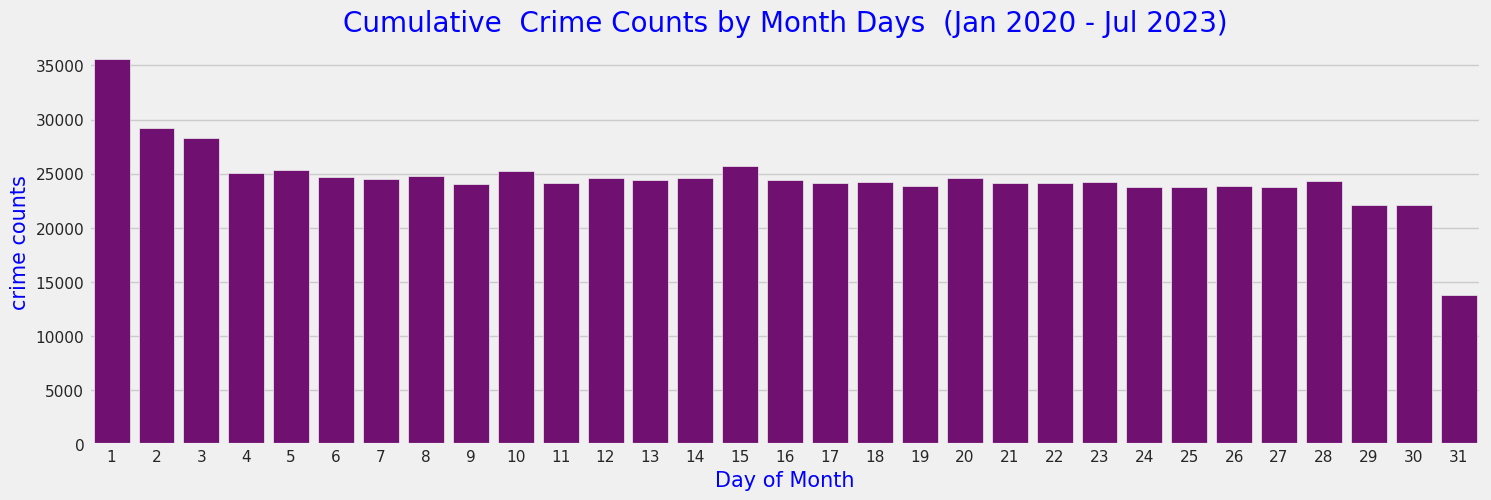

In [14]:
# monthday
sns.barplot(data= df.groupby(by=df['time_occ'].dt.day, as_index=False).size(), 
            x='time_occ', y='size' , color='purple')
plt.title('Cumulative  Crime Counts by Month Days  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.xlabel('Day of Month', fontdict={'color': 'blue', 'size': 15})

## weekly

Text(0.5, 0, 'week')

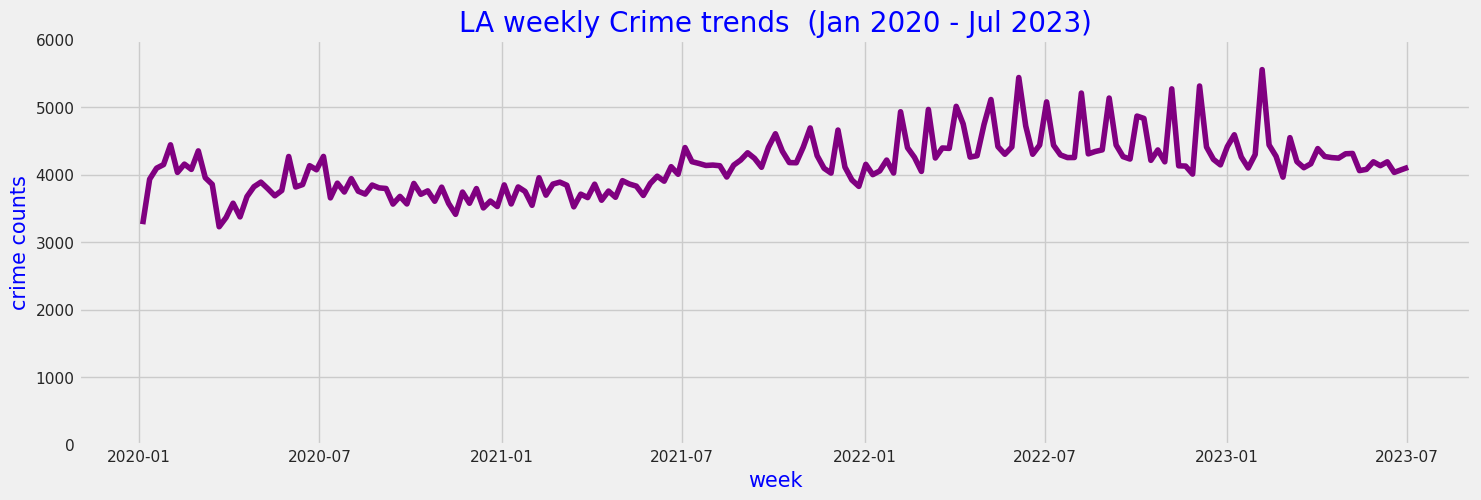

In [15]:
# weekly number of crime
sns.lineplot(data=df.resample('W', on='time_occ').size().iloc[0:-3], color= 'purple')
plt.ylim((0, 6000))
plt.title('LA weekly Crime trends  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.xlabel('week', fontdict={'color': 'blue', 'size': 15})

/tmp/ipykernel_2459/3718154258.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.barplot(data= df1.groupby(by=[df1['time_occ'].dt.week], as_index=False).size(),


Text(0, 0.5, 'crime counts')

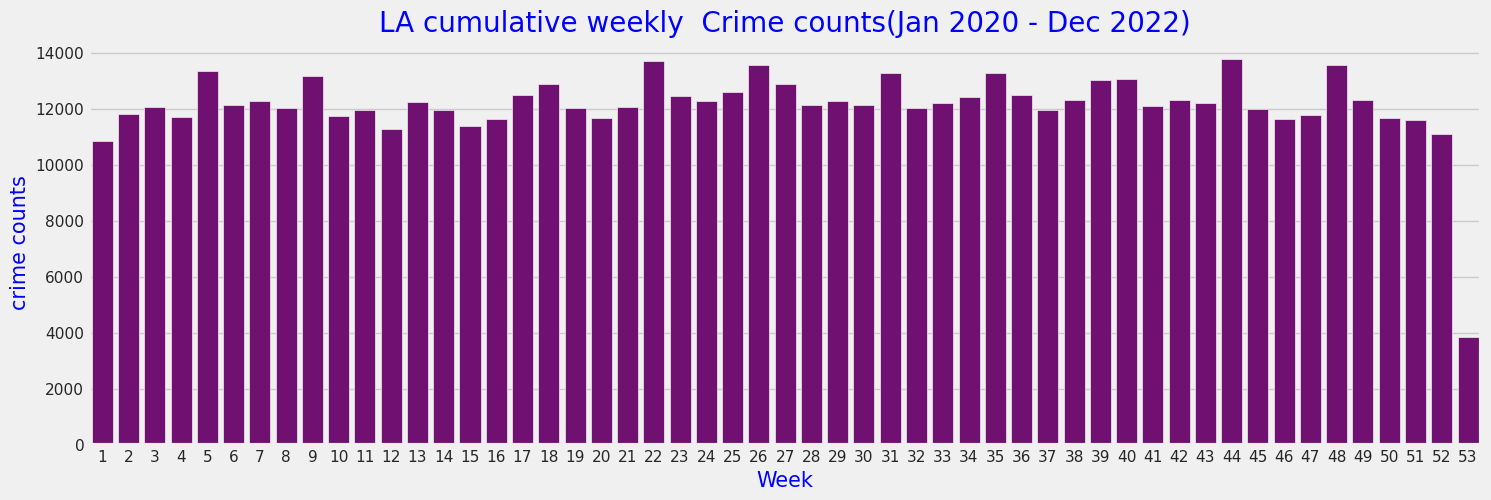

In [16]:
# weekly
# we need to remove 2023 else the graph will be misleading (data end in July2023)
df1 = df.sort_values('time_occ').set_index('time_occ').loc[:'2022-12'].reset_index()

sns.barplot(data= df1.groupby(by=[df1['time_occ'].dt.week], as_index=False).size(), 
            x='time_occ', y='size' , color='purple')
plt.title('LA cumulative weekly  Crime counts(Jan 2020 - Dec 2022)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Week', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})

## by month

Text(0, 0.5, 'crime counts')

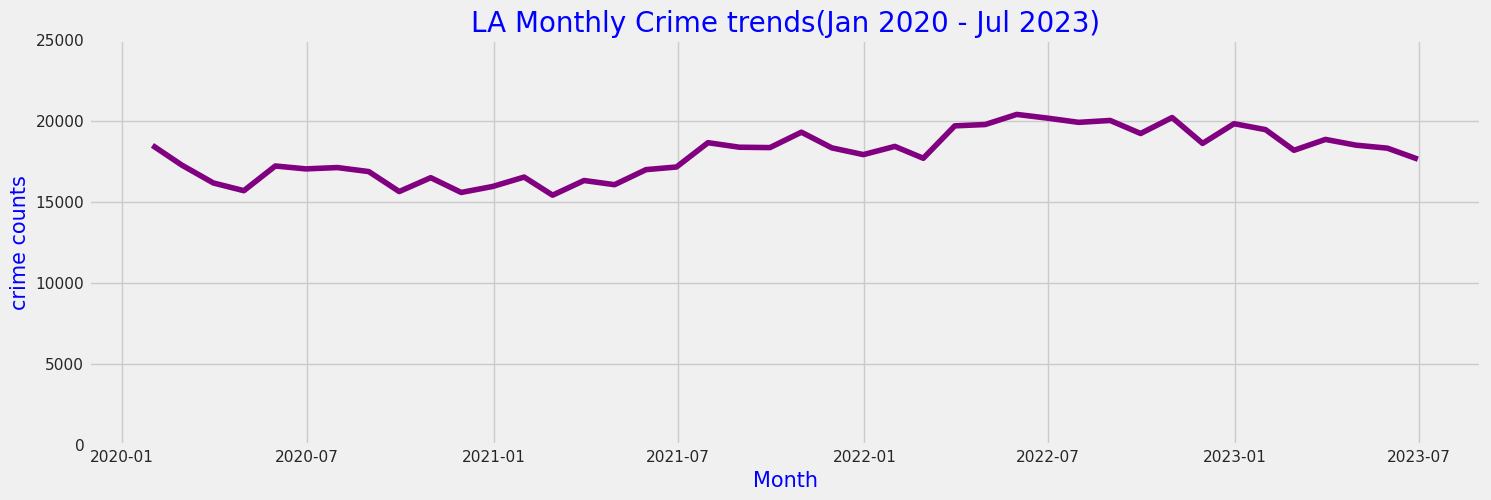

In [17]:
# Monthly number of crime
sns.lineplot(data=df.resample('M', on='time_occ').size().iloc[0:-1], color= 'purple')
plt.ylim((0,25000))
plt.title('LA Monthly Crime trends(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('Month', fontdict={'color': 'blue', 'size':15})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'Month')

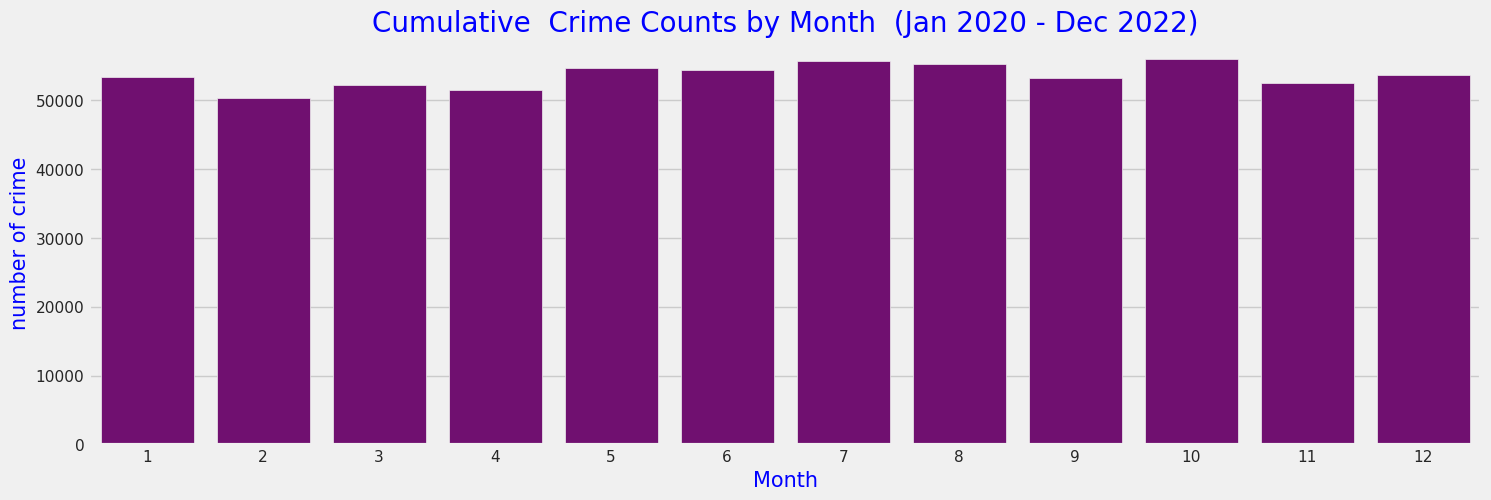

In [18]:
# # monthly
df1 = df.sort_values('time_occ').set_index('time_occ').loc[:'2022-12'].reset_index()
sns.barplot(data= df1.groupby(by=df1['time_occ'].dt.month, as_index=False).size(), 
            x='time_occ', y='size' , color='purple')
plt.title('Cumulative  Crime Counts by Month  (Jan 2020 - Dec 2022)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('number of crime', fontdict={'color': 'blue', 'size':15})
plt.xlabel('Month', fontdict={'color': 'blue', 'size': 15})

## by quarter

Text(0.5, 0, 'calendar quarter')

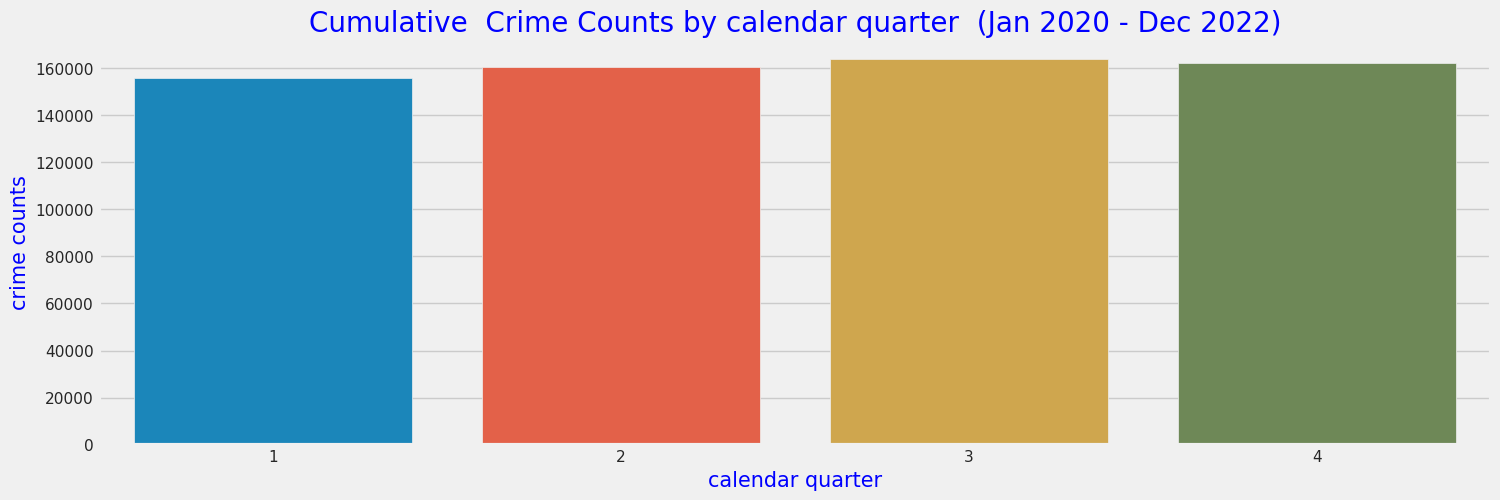

In [19]:

df1 = df.sort_values('time_occ').set_index('time_occ').loc[:'2022-12'].reset_index()
sns.barplot(df1.groupby(df1['time_occ'].dt.quarter, as_index=False).size(), x='time_occ', y='size')

plt.title('Cumulative  Crime Counts by calendar quarter  (Jan 2020 - Dec 2022)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.xlabel('calendar quarter', fontdict={'color': 'blue', 'size': 15})

## crime increase

Text(0.5, 0, 'calendar quarter')

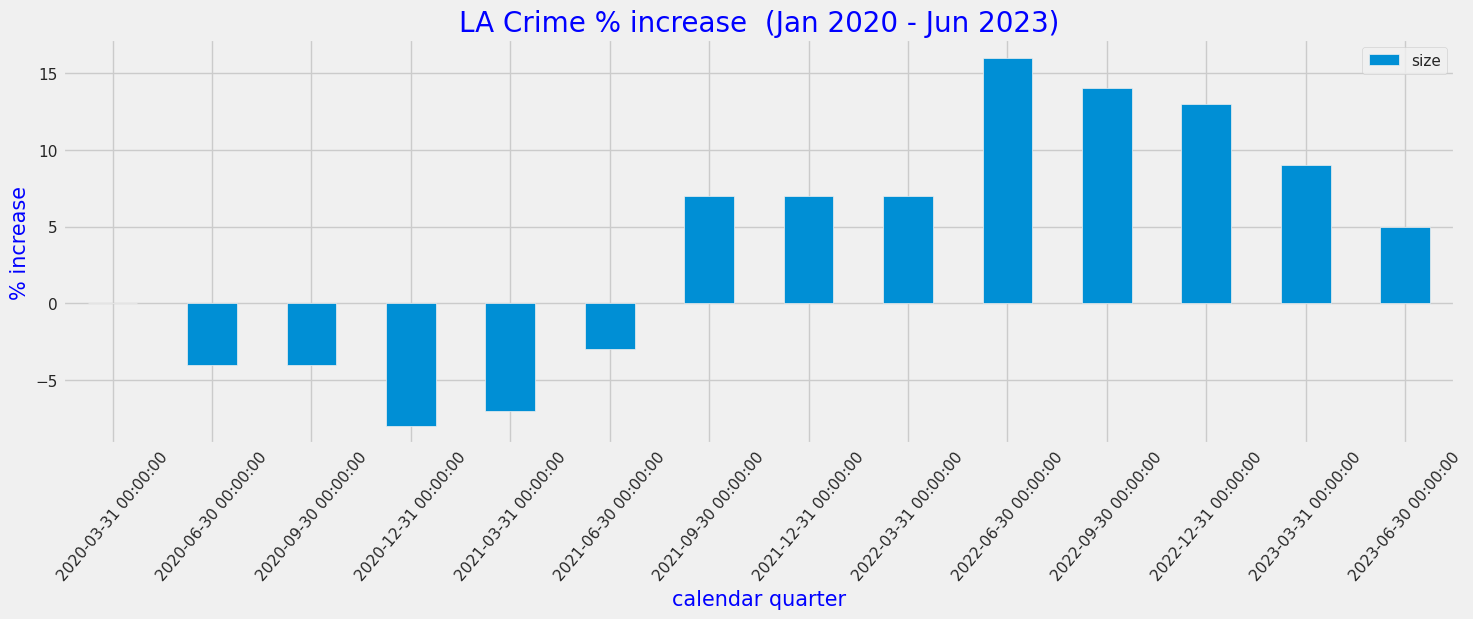

In [20]:
first_val = df.resample('Q', on='time_occ').size().reset_index().loc[0,0]

df1 = df.resample('Q', on='time_occ').size().div(first_val).sub(1).round(2).mul(100).reset_index()
df1.columns = ['time', 'size']
df1.iloc[0:len(df1)-1, :].plot.bar(x='time', y="size")
plt.xticks(rotation=50)
plt.title('LA Crime % increase  (Jan 2020 - Jun 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('% increase', fontdict={'color': 'blue', 'size':15})
plt.xlabel('calendar quarter', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'Month')

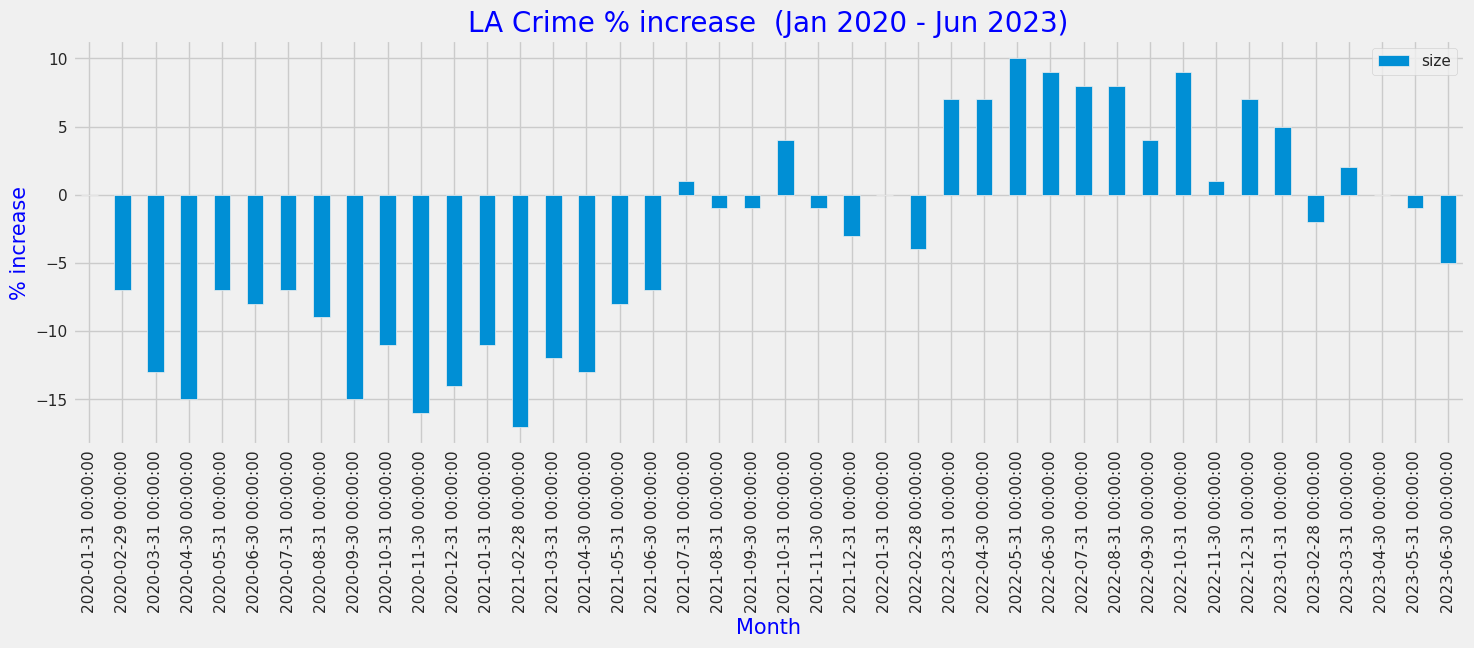

In [21]:
first_val = df.resample('M', on='time_occ').size().reset_index().loc[0,0]

df1 = df.resample('M', on='time_occ').size().div(first_val).sub(1).round(2).mul(100).reset_index()
df1.columns = ['time', 'size']
df1.iloc[0:len(df1)-1, :].plot.bar(x='time', y="size")
#plt.xticks(rotation=90)
plt.title('LA Crime % increase  (Jan 2020 - Jun 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('% increase', fontdict={'color': 'blue', 'size':15})
plt.xlabel('Month', fontdict={'color': 'blue', 'size': 15})

## crime heatmap

Text(0.5, 9.583333333333313, 'hour of the day')

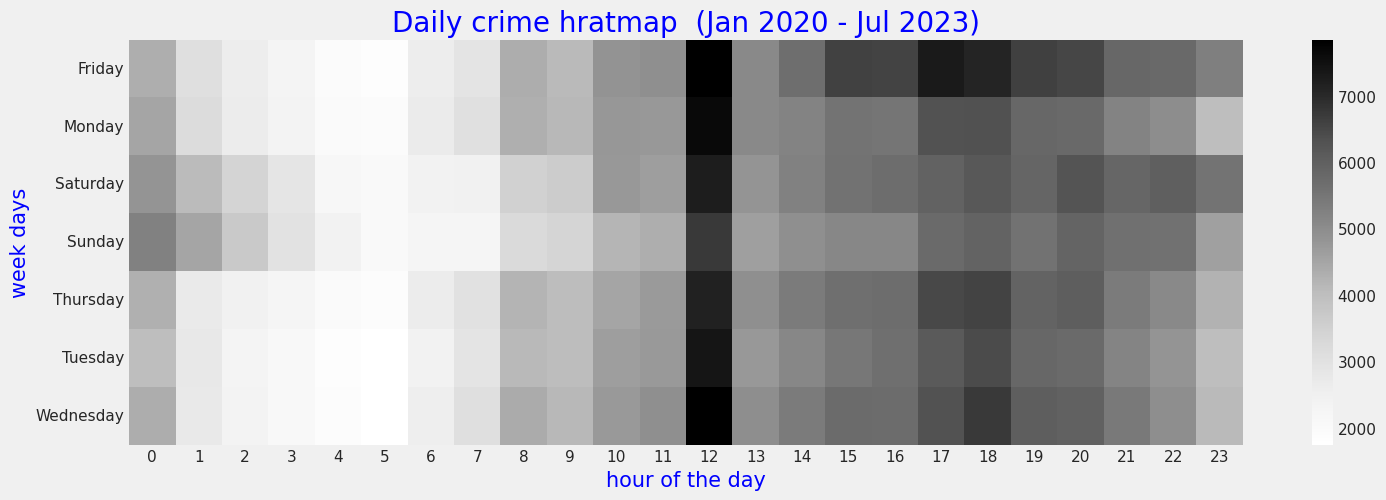

In [22]:
df1 =( df.groupby([df['time_occ'].dt.day_name().rename('week_day'), 
                  df['time_occ'].dt.hour.rename('hour')], as_index=False)
      .size()
      .pivot_table(index='week_day',columns= 'hour', values='size'))

sns.heatmap(df1, cmap='Greys')
plt.title('Daily crime hratmap  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('week days', fontdict={'color': 'blue', 'size':15})
plt.xlabel('hour of the day', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'hour')

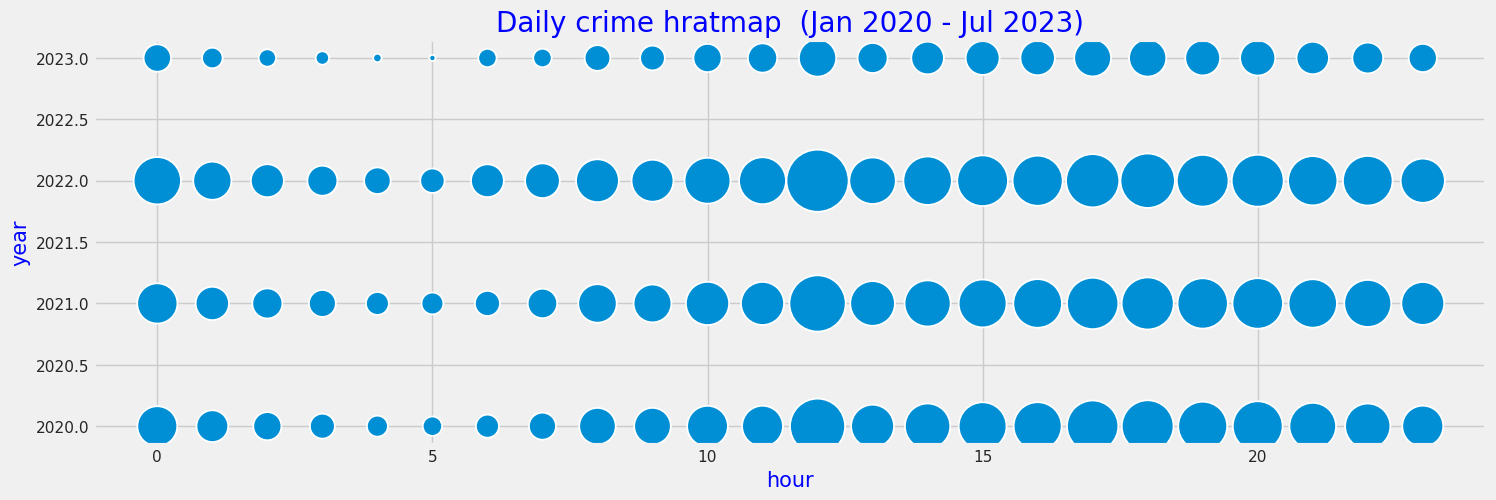

In [23]:
df1 = (df.groupby([df['time_occ'].dt.year.rename('year'), 
                  df['time_occ'].dt.hour.rename('hour')], as_index=False)
      .size() )

sns.scatterplot(data=df1, y='year', x='hour', size='size',sizes=(20, 2000) , legend=False)
plt.title('Daily crime hratmap  (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('year', fontdict={'color': 'blue', 'size':15})
plt.xlabel('hour', fontdict={'color': 'blue', 'size': 15})

# Exploring relationships

Text(0.5, 0, 'area name')

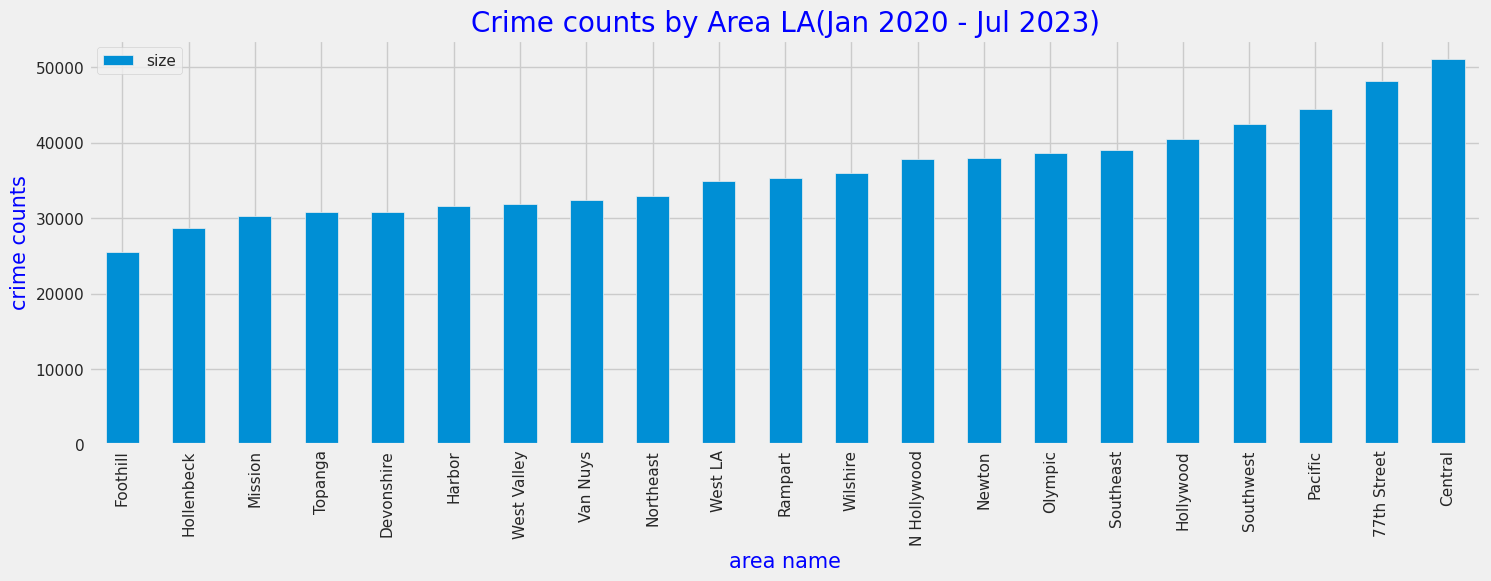

In [24]:
df.groupby('area_name', as_index=False).size().sort_values('size').plot.bar(x='area_name', y='size')
plt.title('Crime counts by Area LA(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.xlabel('area name', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'area name')

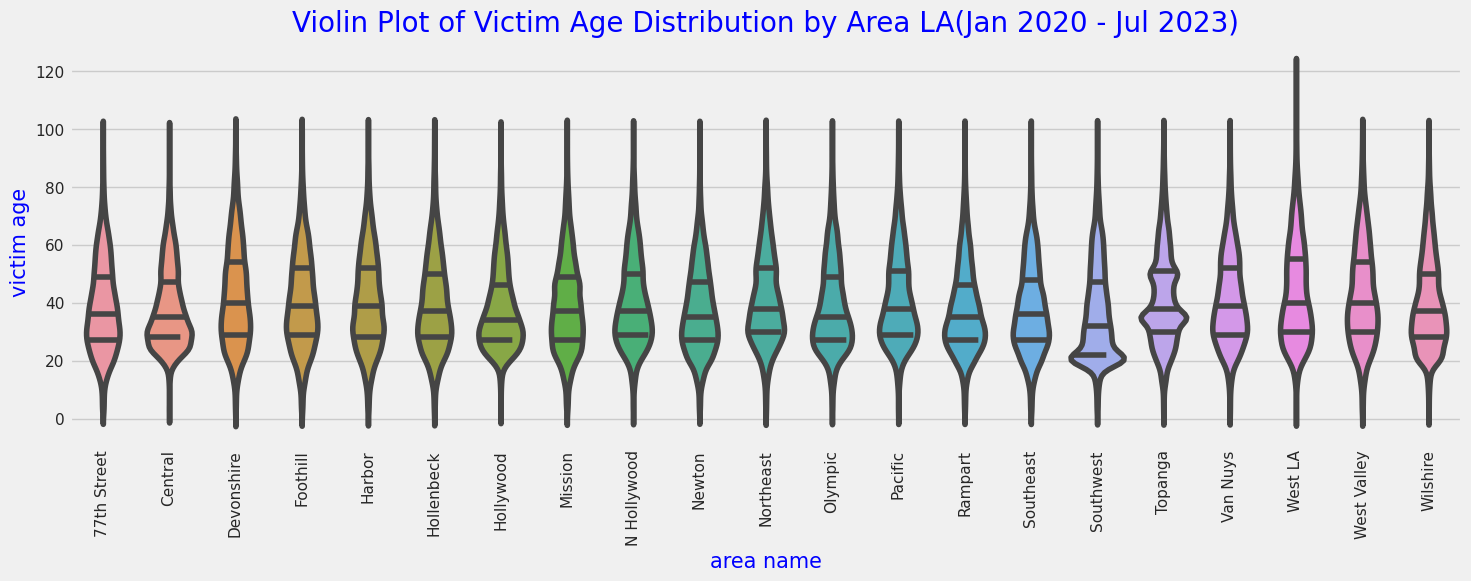

In [25]:
df1 = df
df1['vict_age'].replace(0, np.nan, inplace=True)

sns.violinplot(data=df1, x='area_name', y='vict_age', inner='quartile')
plt.xticks(rotation=90) # Violin Plot of Victim Age Distribution by Area
plt.title('Violin Plot of Victim Age Distribution by Area LA(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('victim age', fontdict={'color': 'blue', 'size':15})
plt.xlabel('area name', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'area name')

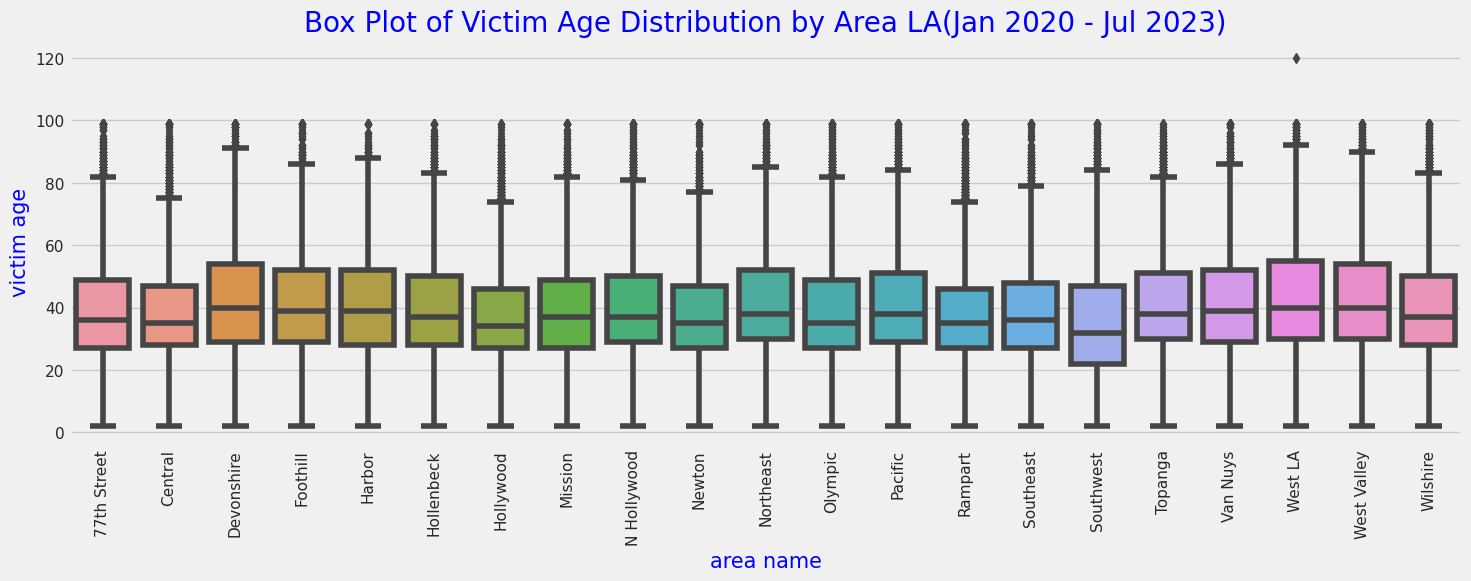

In [26]:
sns.boxplot(data=df1, x='area_name', y='vict_age')
plt.xticks(rotation=90)
plt.title('Box Plot of Victim Age Distribution by Area LA(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('victim age', fontdict={'color': 'blue', 'size':15})
plt.xlabel('area name', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0, 'area name')

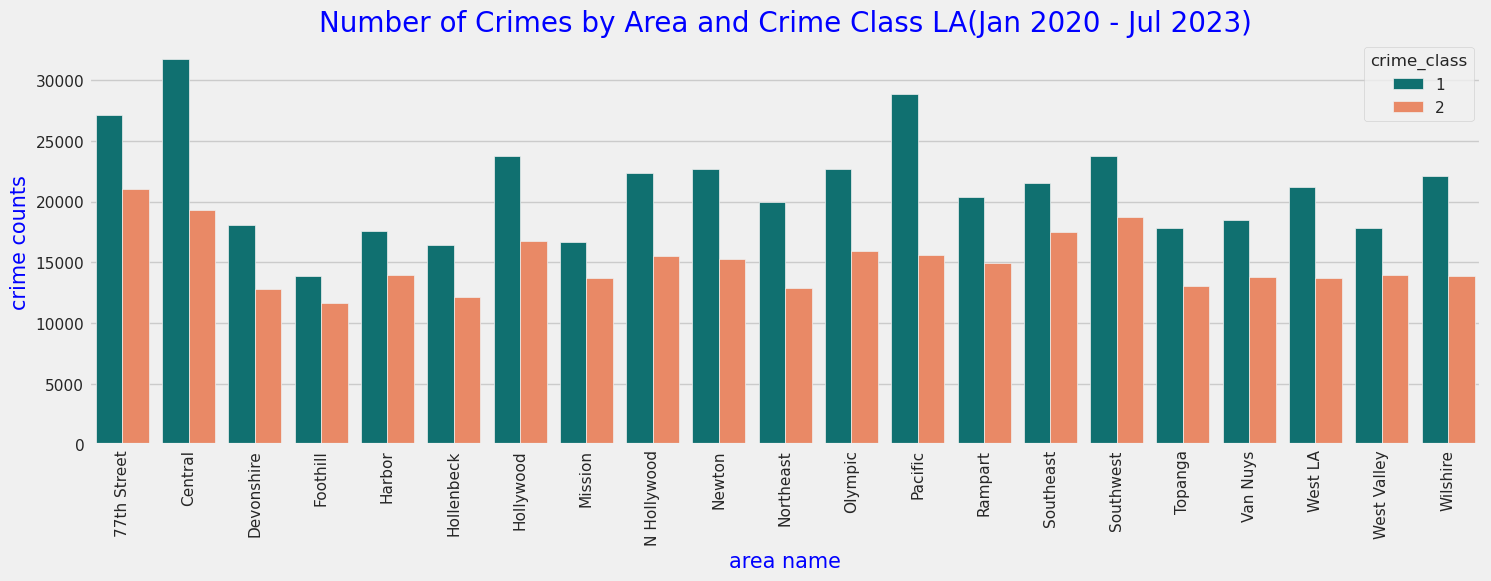

In [27]:
df1 =(df.groupby(by=['area_name', 'crime_class'], as_index=False)
       .size())
sns.barplot(data=df1, x='area_name', y='size', palette=['teal', 'coral'], hue='crime_class')
plt.xticks(rotation=90)
plt.title('Number of Crimes by Area and Crime Class LA(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.ylabel('crime counts', fontdict={'color': 'blue', 'size':15})
plt.xlabel('area name', fontdict={'color': 'blue', 'size': 15})

Text(0.5, 0.98, 'Top 5 Most Prevalent Crimes by Area in Los Angeles (Jan 2020 - Jul 2023)')

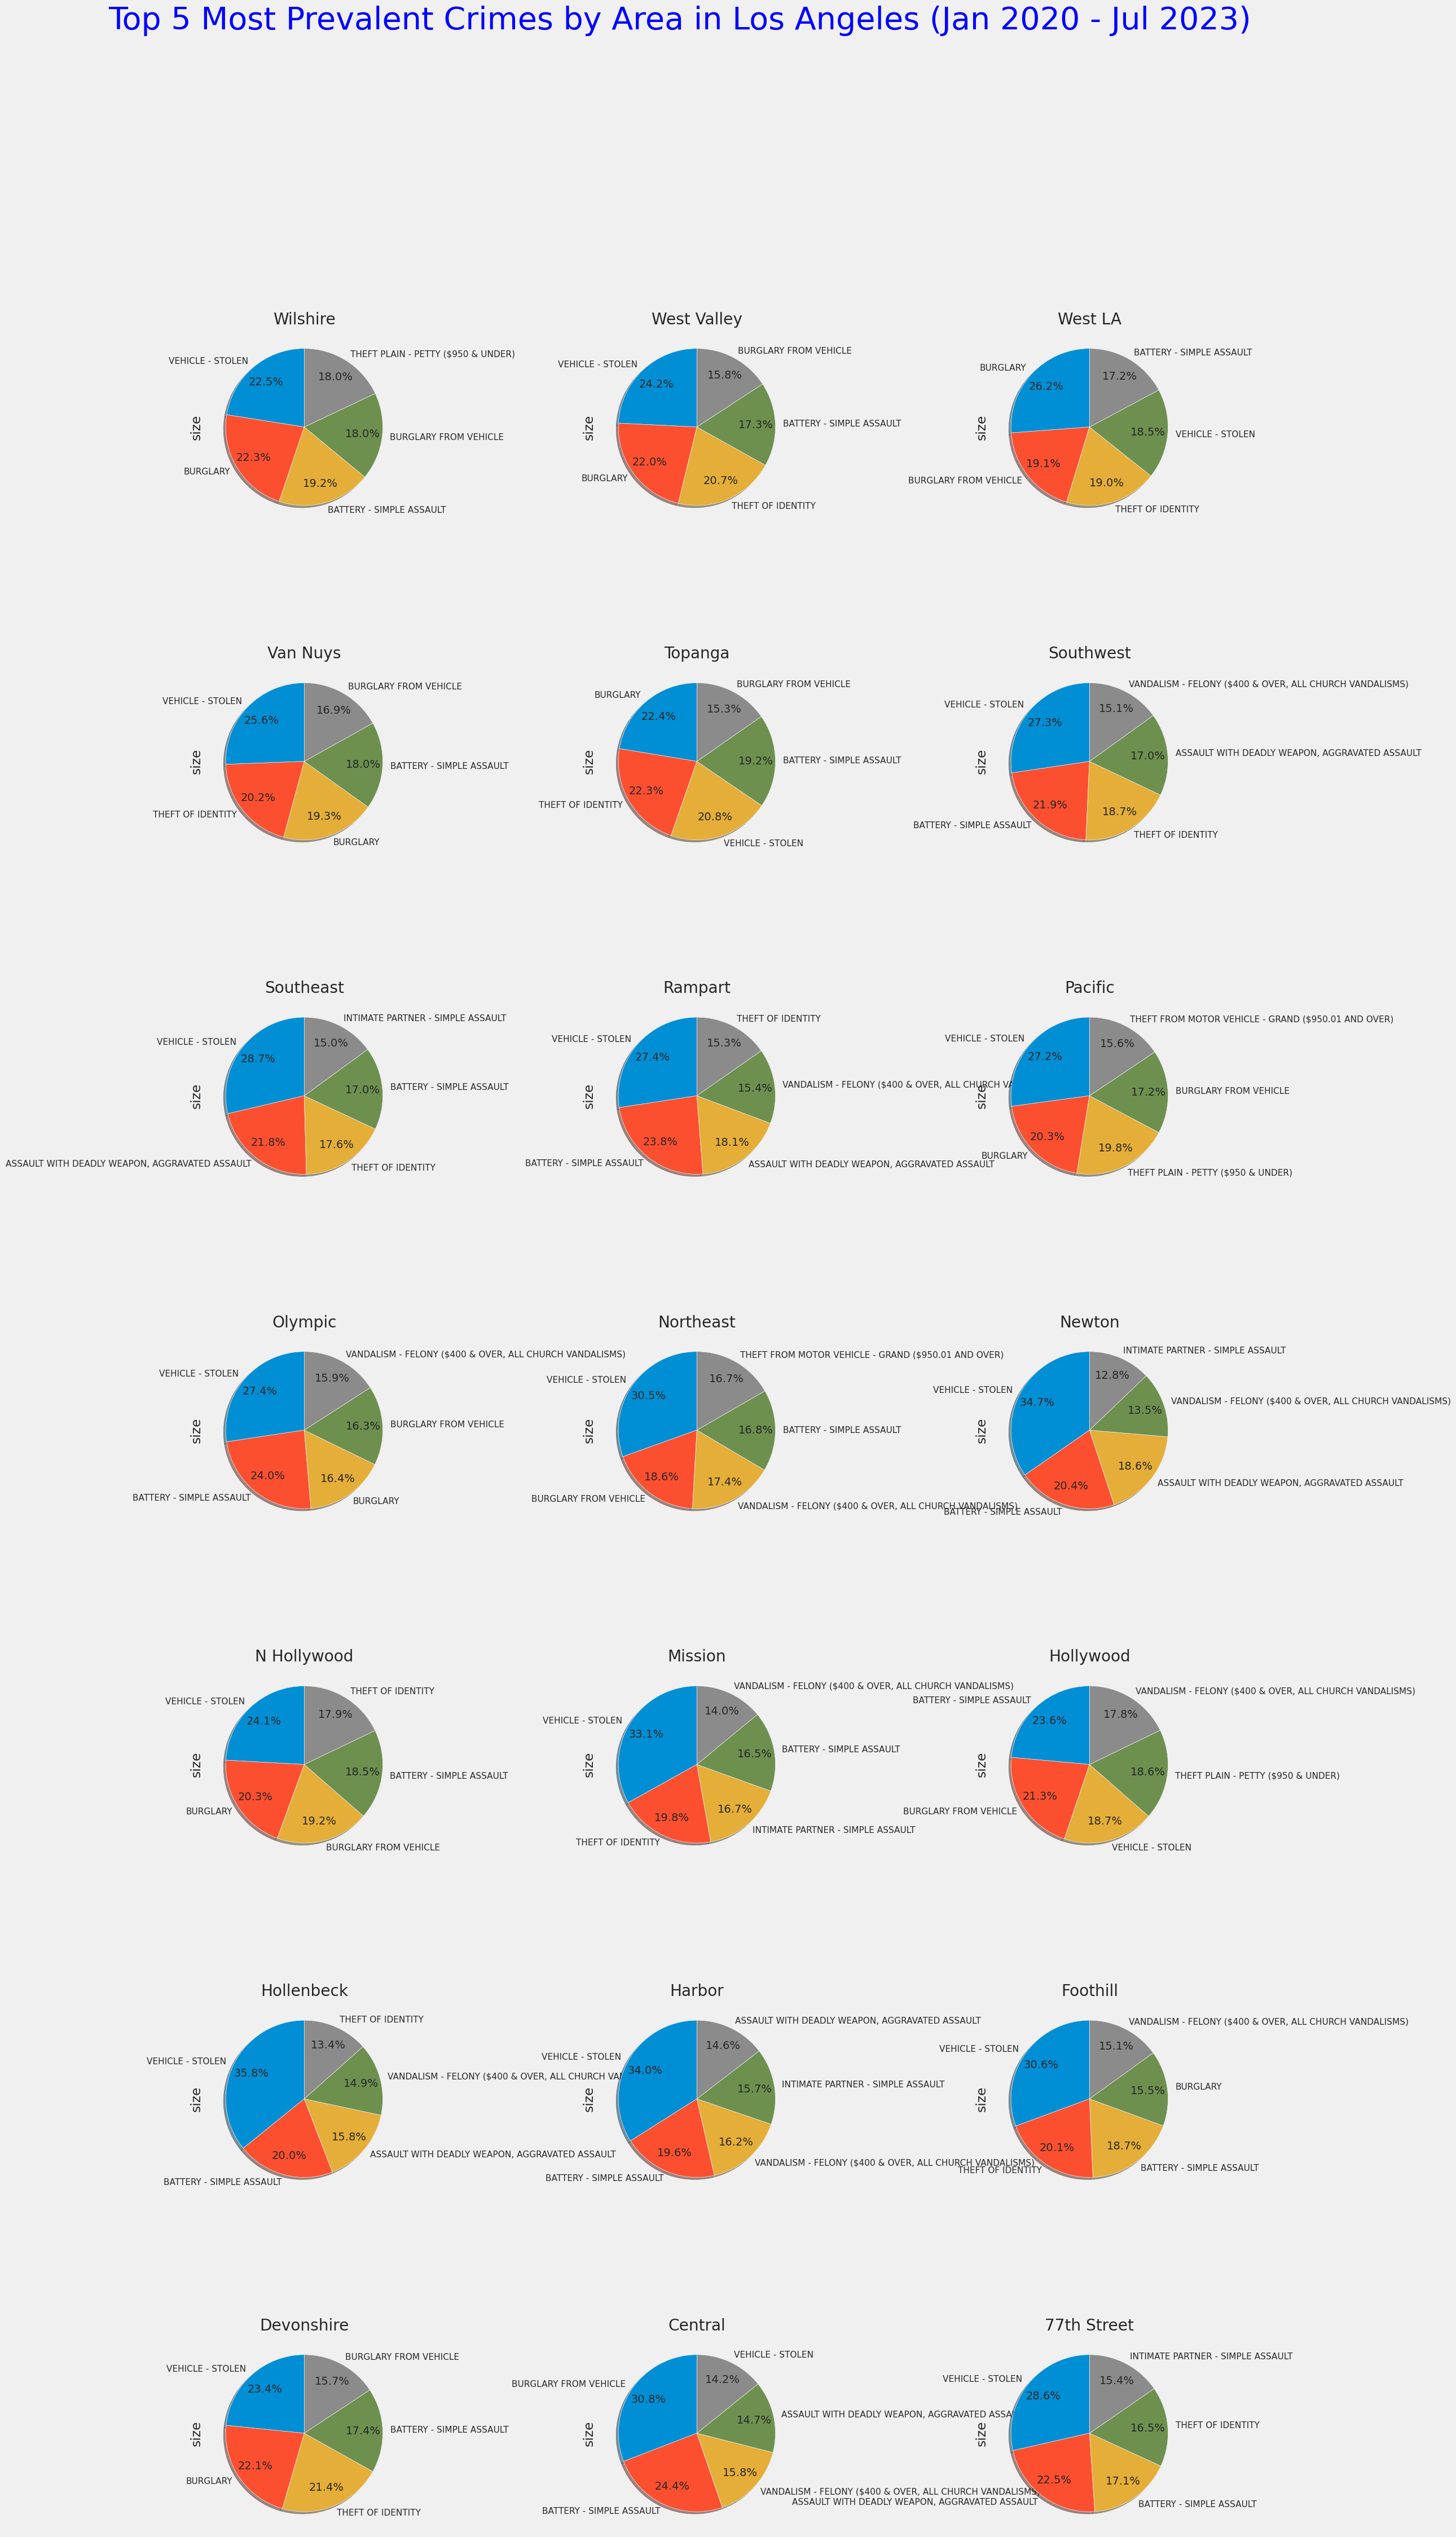

In [28]:
df1 = (df.groupby(['area_name', 'crime_dsp'], as_index=False).size()
 .sort_values(by=['area_name', 'size'], ascending=False))
#final_df=pd.DataFrame()
fig=plt.figure(figsize=(20, 50))
gs = gridspec.GridSpec(7,3, wspace=1)
i, j = 0, 0

for area in df1['area_name'].unique().tolist():
    data = df1[df1['area_name']==area].head()
    ax = fig.add_subplot(gs[i,j])
    data.plot(kind='pie',autopct="%1.1f%%", y='size', labels=data['crime_dsp'],
                     startangle=90,
                     shadow=True,
                     #colors = ["red", "blue", 'tomato', 'green', 'yellow'],
                     pctdistance=0.75 ,ax=ax, legend=False)
    ax.set_title(f'{area}')
    if j == 2:
        i +=1
        j = 0
    else:
        j+=1
        
fig.suptitle('Top 5 Most Prevalent Crimes by Area in Los Angeles (Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'horizontalalignment': 'center'}, fontsize=40)


Text(102.58333333333333, 0.5, 'area name')

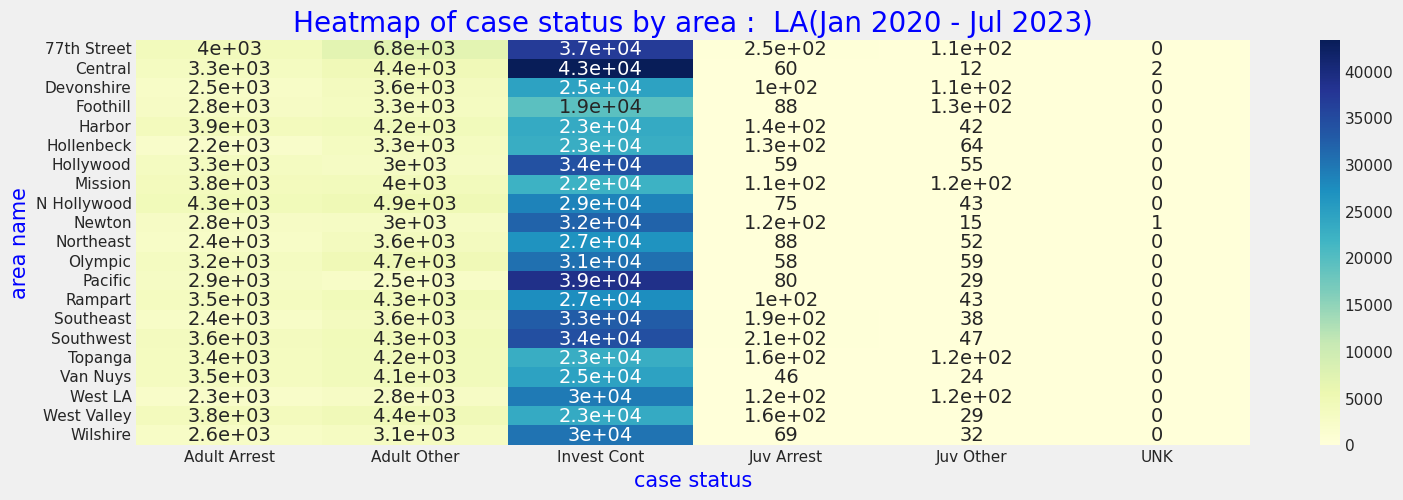

In [30]:
sns.heatmap(pd.crosstab(df['area_name'], df['case_status']), cmap='YlGnBu',annot=True)
plt.title('Heatmap of case status by area :  LA(Jan 2020 - Jul 2023)', 
             fontdict={'color':'blue', 'size':20, 'horizontalalignment': 'center'})
plt.xlabel('case status', fontdict={'color': 'blue', 'size':15})
plt.ylabel('area name', fontdict={'color': 'blue', 'size': 15})